In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:/DL_ML_AiQuest_PacticeWork/class_practice_project/Datasets/mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.drop(["CustomerID", "Gender"], axis=1, inplace=True)

In [6]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
df.rename(columns={'Age':'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [8]:
df.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
df.shape

(200, 3)

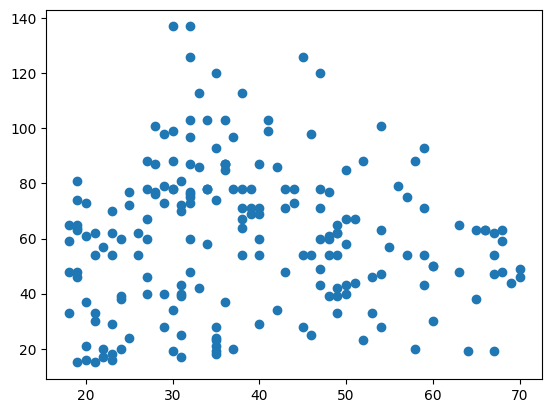

In [10]:
plt.scatter(df['age'], df['income'])
plt.show()

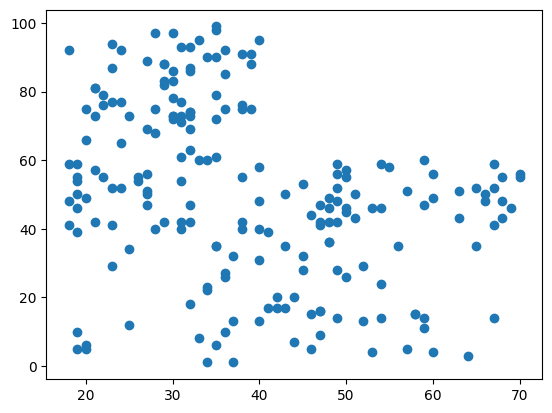

In [11]:
plt.scatter(df['age'], df['score'])
plt.show()

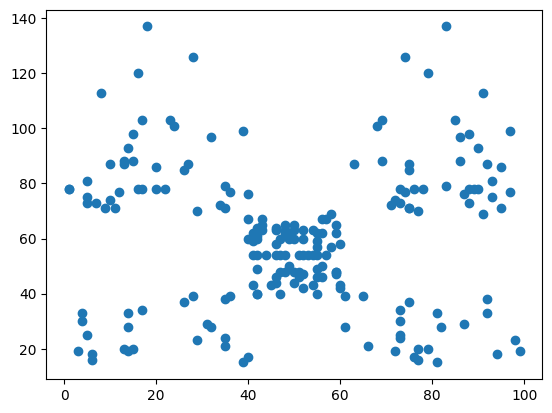

In [12]:
plt.scatter(df['score'], df['income'])
plt.show()

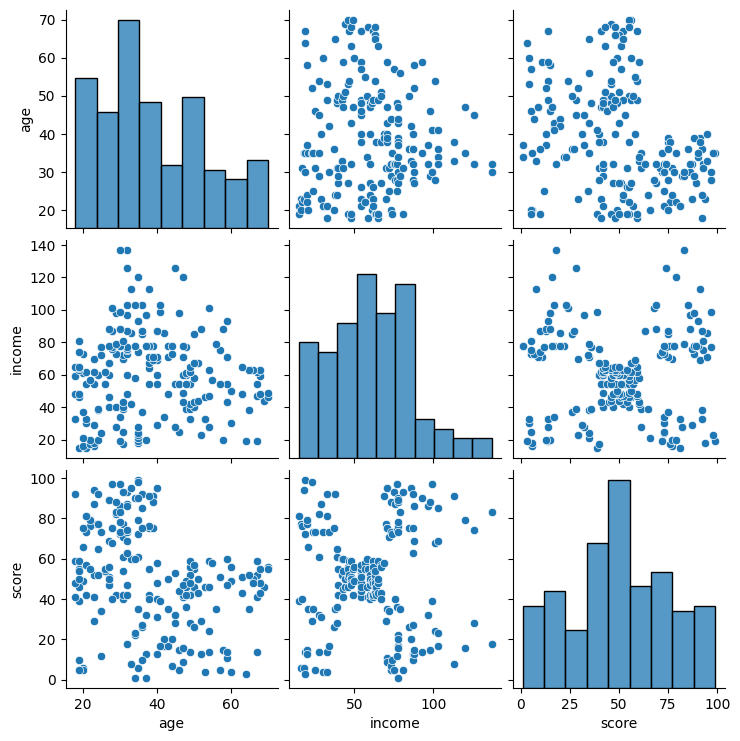

In [13]:
import seaborn as sns
sns.pairplot(df[['age', 'income', 'score']])
plt.savefig('mall_customers.png')
plt.show()

<h1>K-Means Cluster</h1>

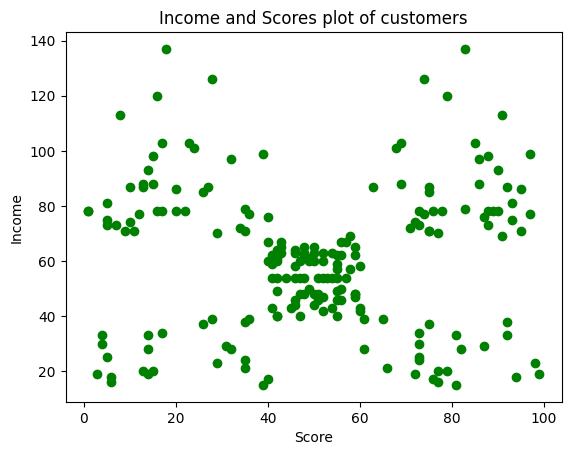

In [14]:
plt.scatter(df['score'], df['income'], color='green')
plt.xlabel("Score")
plt.ylabel("Income")
plt.title("Income and Scores plot of customers")
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans()

In [17]:
km.fit(df[['score', 'income']])

KMeans()

In [18]:
km.predict(df[['score', 'income']])

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 2, 5, 5,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 1, 5, 5, 5, 5,
       5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 6, 1, 6, 7, 6, 7, 6,
       1, 6, 7, 6, 7, 6, 7, 6, 7, 6, 1, 6, 7, 6, 1, 6, 7, 6, 7, 6, 7, 6,
       7, 6, 7, 6, 7, 6, 1, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6,
       7, 6, 7, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [19]:
km.cluster_centers_

array([[ 82.72727273, 108.18181818],
       [ 46.1627907 ,  63.72093023],
       [ 80.04761905,  25.0952381 ],
       [ 22.        , 109.7       ],
       [ 19.52380952,  25.14285714],
       [ 51.40909091,  47.29545455],
       [ 81.89285714,  78.03571429],
       [ 12.68181818,  80.18181818]])

In [20]:
df['Group1'] = km.predict(df[['score', 'income']])
df.head()

,age,income,score,Group1
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


In [21]:
df['Group1'].unique()

array([4, 2, 5, 1, 6, 7, 0, 3])

In [22]:
df0 = df[df['Group1'] == 0]
df1 = df[df['Group1'] == 1]
df2 = df[df['Group1'] == 2]
df3 = df[df['Group1'] == 3]
df4 = df[df['Group1'] == 4]
df5 = df[df['Group1'] == 5]
df6 = df[df['Group1'] == 6]
df7 = df[df['Group1'] == 7]

In [23]:
df0.head()

,age,income,score,Group1
179,35,93,90,0
181,32,97,86,0
183,29,98,88,0
185,30,99,97,0
187,28,101,68,0


In [24]:
df0.shape

(11, 4)

In [25]:
centroid = km.cluster_centers_
centroid

array([[ 82.72727273, 108.18181818],
       [ 46.1627907 ,  63.72093023],
       [ 80.04761905,  25.0952381 ],
       [ 22.        , 109.7       ],
       [ 19.52380952,  25.14285714],
       [ 51.40909091,  47.29545455],
       [ 81.89285714,  78.03571429],
       [ 12.68181818,  80.18181818]])

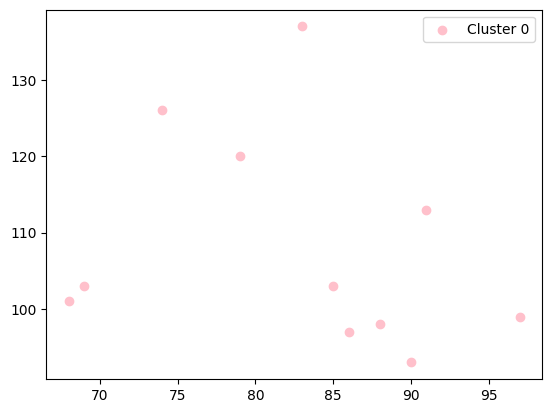

In [26]:
plt.scatter(df0['score'], df0['income'], color='pink', label="Cluster 0")
plt.legend()
plt.show()

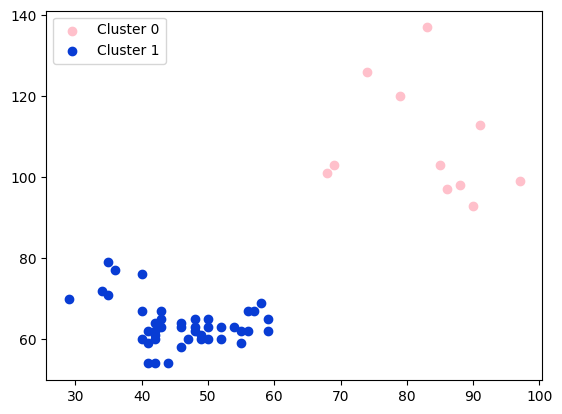

In [27]:
plt.scatter(df0['score'], df0['income'], color='pink', label='Cluster 0')
plt.scatter(df1['score'], df1['income'], color='#083CD4', label='Cluster 1')
plt.legend()
plt.show()

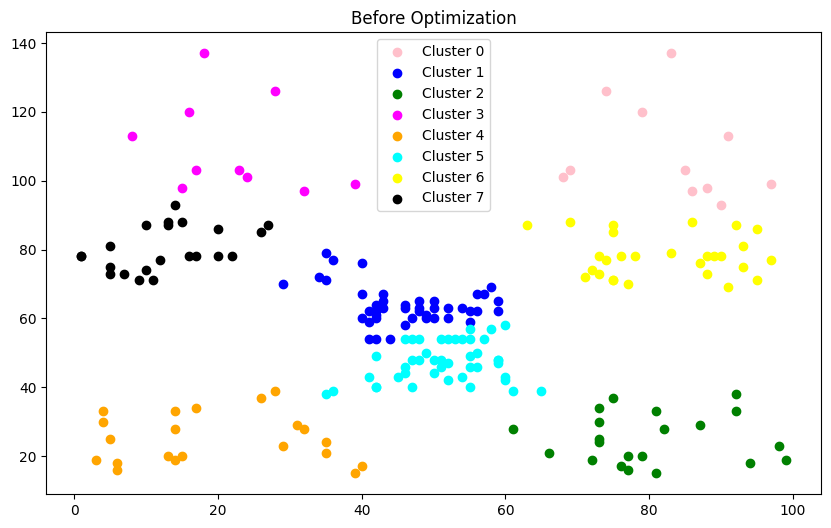

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df0['score'], df0['income'], color='pink', label="Cluster 0")
plt.scatter(df1['score'], df1['income'], color='blue', label="Cluster 1")
plt.scatter(df2['score'], df2['income'], color='green', label="Cluster 2")
plt.scatter(df3['score'], df3['income'], color='magenta', label="Cluster 3")
plt.scatter(df4['score'], df4['income'], color='orange', label="Cluster 4")
plt.scatter(df5['score'], df5['income'], color='cyan', label="Cluster 5")
plt.scatter(df6['score'], df6['income'], color='yellow', label="Cluster 6")
plt.scatter(df7['score'], df7['income'], color='black', label="Cluster 7")

plt.title("Before Optimization")
plt.legend()
plt.show()

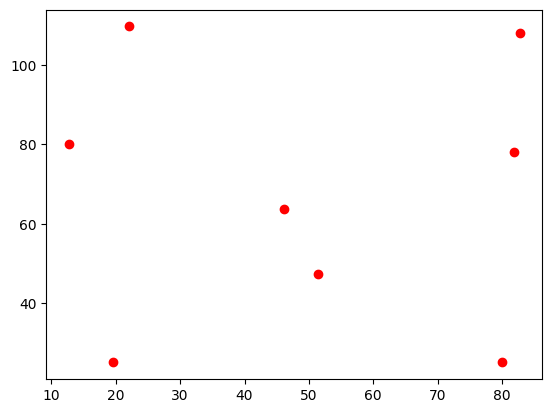

In [29]:
plt.scatter(centroid[:, 0], centroid[:, 1], color='red', label="Centroid")
plt.show()

In [30]:
centroid

array([[ 82.72727273, 108.18181818],
       [ 46.1627907 ,  63.72093023],
       [ 80.04761905,  25.0952381 ],
       [ 22.        , 109.7       ],
       [ 19.52380952,  25.14285714],
       [ 51.40909091,  47.29545455],
       [ 81.89285714,  78.03571429],
       [ 12.68181818,  80.18181818]])

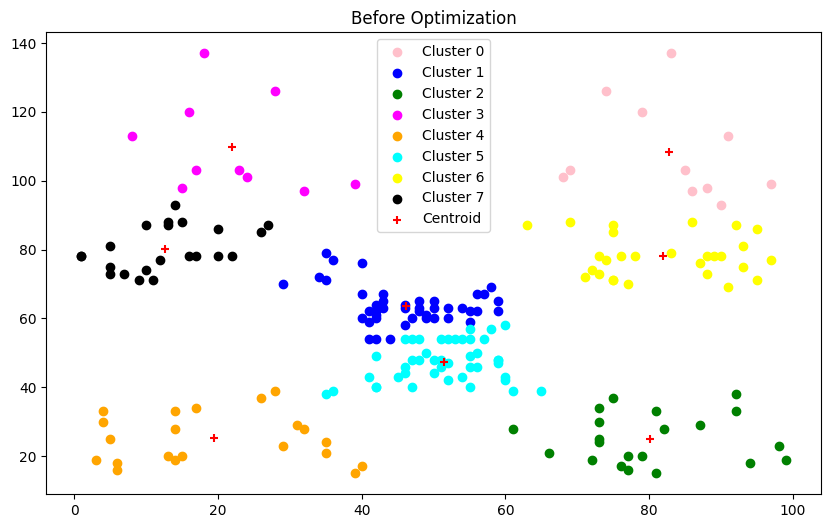

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df0['score'], df0['income'], color='pink', label="Cluster 0")
plt.scatter(df1['score'], df1['income'], color='blue', label="Cluster 1")
plt.scatter(df2['score'], df2['income'], color='green', label="Cluster 2")
plt.scatter(df3['score'], df3['income'], color='magenta', label="Cluster 3")
plt.scatter(df4['score'], df4['income'], color='orange', label="Cluster 4")
plt.scatter(df5['score'], df5['income'], color='cyan', label="Cluster 5")
plt.scatter(df6['score'], df6['income'], color='yellow', label="Cluster 6")
plt.scatter(df7['score'], df7['income'], color='black', label="Cluster 7")

plt.scatter(centroid[:, 0], centroid[:, 1], color='red', label="Centroid", marker="+")

plt.title("Before Optimization")
plt.legend()
plt.show()

In [32]:
km.inertia_

25022.48500453035

<h1>Optimizing KMeans</h1>

In [33]:
wcss = [] #Within-cluster sum of squares
clusters = range(1, 15)
for k in clusters:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['score', 'income']])
    wcss.append(km2.inertia_)

In [34]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30227.606513152015,
 25028.02047526941,
 21818.11458845218,
 19746.911957660894,
 17862.28058787618,
 16011.917284023166,
 14924.436896887244,
 12746.969092182328]

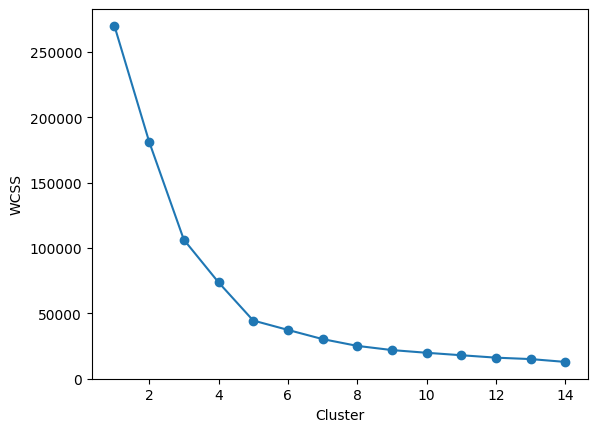

In [35]:
#Elbow Plot
plt.plot(clusters, wcss, marker='o')
plt.ylabel('WCSS')
plt.xlabel('Cluster')
plt.show()

In [36]:
pip install --upgrade kneed

Note: you may need to restart the kernel to use updated packages.


In [37]:
from kneed import KneeLocator

In [39]:
kn = KneeLocator(clusters, wcss, direction='decreasing', curve='convex')

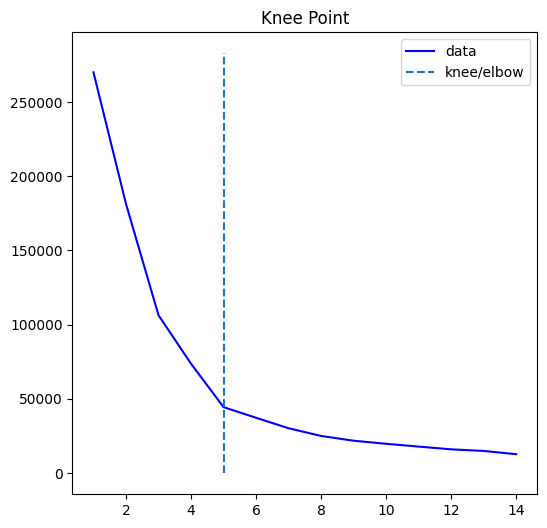

In [40]:
kn.plot_knee()

In [41]:
print('Optimal Number of Cluster is =', kn.knee)

Optimal Number of Cluster is = 5


<h1>After Optimizing</h1>

In [42]:
km = KMeans(n_clusters=5) #i know 5 is optimal
df['Group2'] = km.fit_predict(df[['score', 'income']]) #fit_predict()

In [43]:
df.head()

,age,income,score,Group1,Group2
0,19,15,39,4,2
1,21,15,81,2,4
2,20,16,6,4,2
3,23,16,77,2,4
4,31,17,40,4,2


In [44]:
cen = km.cluster_centers_
cen

array([[82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [20.91304348, 26.30434783],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273]])

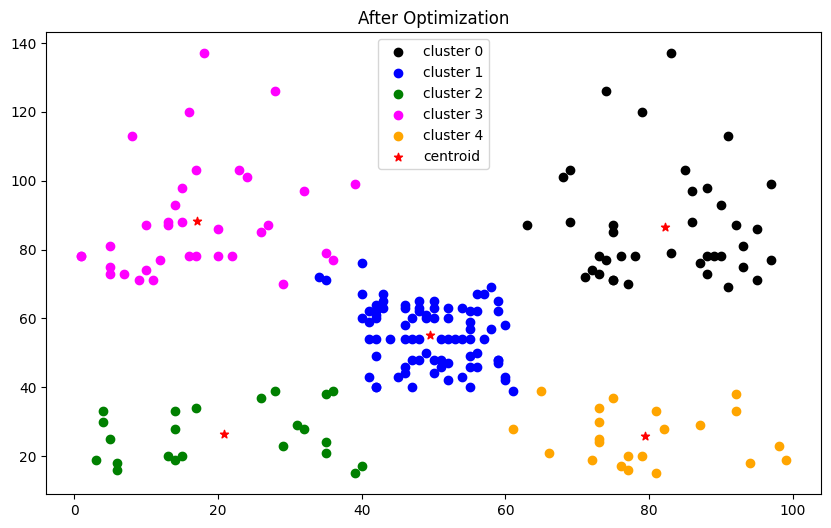

In [45]:
df0 = df[df.Group2 == 0]
df1 = df[df.Group2 == 1]
df2 = df[df.Group2 == 2]
df3 = df[df.Group2 == 3]
df4 = df[df.Group2 == 4]

plt.figure(figsize=(10,6))
plt.scatter(df0.score, df0.income, color='black', label='cluster 0')
plt.scatter(df1.score, df1.income, color='blue', label='cluster 1')
plt.scatter(df2.score, df2.income, color='green', label='cluster 2')
plt.scatter(df3.score, df3.income, color='magenta', label='cluster 3')
plt.scatter(df4.score, df4.income, color='orange', label='cluster 4')

plt.scatter(cen[:, 0], cen[:,1], color='red', label='centroid', marker='*')
plt.title('After Optimization')

plt.legend()